# Sistema de Percepción Avanzados
## "Reconocimiento de Expresión en Rostros Faciales"
##### Trabajo Final - Jesús Campo López - NIA: 100489972

**Este trabajo va a consistir en el entrenamiento de diversos modelos con el objetivo de clasificar e identificar las emociones de diferentes rostros de personas, y poder establecer una comparación entre los modelos y determinar cual produce mejores resultados. En concreto, esta clasificación va a ser sobre 7 emociones distintas:**

**-Enfado**

**-Disgusto**

**-Miedo**

**-Felicidad**

**-Neutro**

**-Tristeza**

**-Sorpresa**

In [341]:
# Se importan las librerias necesarias

import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import MobileNet

from keras.models import Model

from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, BatchNormalization, Activation, MaxPooling2D

# Definición de constantes para las dimensiones de las imagenes
batch_size = 32
IMG_HEIGHT = 75
IMG_WIDTH = 75

# Directorios de entrenamiento y de validacion
training_dir = 'Reduced_Dataset/train'
validation_dir = 'Reduced_Dataset/test'

In [342]:
# Lectura de las imagenes de entrenamiento y de validación

# Se aplica un reescalado en todas las imagenes para que su valor sea entre 0 y 1
gen = ImageDataGenerator(rescale=1./255)

# Se leen las imagenes de entrenamiento y validacion con la siguiente función
train_data_gen = gen.flow_from_directory(batch_size=batch_size, 
                                         directory=training_dir, 
                                         seed=32, #Seed for shuffing
                                         shuffle=True, 
                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                         class_mode='categorical')


val_data_gen= gen.flow_from_directory(batch_size=batch_size,
                                      directory=validation_dir,
                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                      class_mode='categorical',
                                      shuffle=False)

Found 19900 images belonging to 7 classes.
Found 5543 images belonging to 7 classes.


In [343]:
# Se carga el modelo base elegido, con los parametros adecuados en cuanto a dimensiones y pesos
# MODELO VGG16
#base_model_VGG = VGG16(weights='imagenet', input_shape = [IMG_HEIGHT, IMG_WIDTH] + [3], include_top = False)

# MODELO INCEPTIONV3
#base_model_INC = InceptionV3(weights='imagenet', input_shape = [IMG_HEIGHT, IMG_WIDTH] + [3], include_top = False)

# MODELO MOBILENET
base_model_MOB = MobileNet(weights='imagenet', input_shape = [IMG_HEIGHT, IMG_WIDTH] + [3], include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [344]:
# Indicamos que los pesos de las capas convolucionales de VGG16 deben permanecer fijos
# y añadimos las capas asociadas al clasificador
'''
# MODELO VGG16
for layer in base_model_VGG.layers:
    layer.trainable = False
'''
'''
# MODELO INCEPTIONV3
for layer in base_model_INC.layers:
    layer.trainable = False
'''

# MODELO MOBILENET
for layer in base_model_MOB.layers:
    layer.trainable = False


In [345]:
# Se crea un modelo secuencial de cero
model=tf.keras.Sequential() 

# Se añade la parte convolucional del modelo previamente cargado
#model.add(base_model_VGG) 
#model.add(base_model_INC)
model.add(base_model_MOB)

# Se añade la capa de aplanamiento
model.add(Flatten())

# Primera capa totalmente conectada
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Segunda capa totalmente conectada
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))


In [346]:
# Compilación del modelo
# Parámetros: Learning rate : 0.001; Métricas: Precisión y Pérdidas Categóricas

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


In [348]:
# Ahora aplicamos el metodo fit() para el primer entrenamiento del modelo, con 10 ciclos

history = model.fit(train_data_gen, batch_size=32, epochs=10, validation_data = val_data_gen)

Epoch 1/10
622/622 [==============================] - 84s 135ms/step - loss: 1.5611 - accuracy: 0.4084 - val_loss: 1.4517 - val_accuracy: 0.4434
Epoch 2/10
622/622 [==============================] - 77s 124ms/step - loss: 1.3926 - accuracy: 0.4674 - val_loss: 1.4303 - val_accuracy: 0.4617
Epoch 3/10
622/622 [==============================] - 79s 128ms/step - loss: 1.2951 - accuracy: 0.5087 - val_loss: 1.4160 - val_accuracy: 0.4597
Epoch 4/10
622/622 [==============================] - 88s 141ms/step - loss: 1.2096 - accuracy: 0.5436 - val_loss: 1.4129 - val_accuracy: 0.4820
Epoch 5/10
622/622 [==============================] - 80s 128ms/step - loss: 1.1153 - accuracy: 0.5810 - val_loss: 1.4403 - val_accuracy: 0.4696
Epoch 6/10
622/622 [==============================] - 82s 132ms/step - loss: 1.0335 - accuracy: 0.6134 - val_loss: 1.4562 - val_accuracy: 0.4723
Epoch 7/10
622/622 [==============================] - 77s 124ms/step - loss: 0.9468 - accuracy: 0.6488 - val_loss: 1.5627 - val_ac

In [349]:
# Se guardan los resultados de precisión y de pérdidas obtenidos en el primer entrenamiento
entrenamiento_pre = history.history["accuracy"]
validacion_pre = history.history["val_accuracy"]

perdidas_entrenamiento = history.history['loss']
perdidas_validacion = history.history['val_loss']

# Se vuelve a llamar al metodo fit() para un segundo y último entrenamiento con los mismos parámetros que el primero
history = model.fit(train_data_gen, batch_size=32, epochs=10, validation_data = val_data_gen)

# Se amplia la lista que almacena los distintos valores de precisión y de pérdidas
entrenamiento_pre_total = entrenamiento_pre + history.history['accuracy']
validacion_pre_total = validacion_pre + history.history['val_accuracy']

perdidas_entrenamiento_total = perdidas_entrenamiento + history.history['loss']
perdidas_validacion_total = perdidas_validacion + history.history['val_loss']

Epoch 1/10
622/622 [==============================] - 87s 140ms/step - loss: 0.6647 - accuracy: 0.7575 - val_loss: 1.7241 - val_accuracy: 0.4815
Epoch 2/10
622/622 [==============================] - 74s 120ms/step - loss: 0.5851 - accuracy: 0.7826 - val_loss: 1.8795 - val_accuracy: 0.4844
Epoch 3/10
622/622 [==============================] - 70s 113ms/step - loss: 0.5519 - accuracy: 0.7968 - val_loss: 1.9434 - val_accuracy: 0.4828
Epoch 4/10
622/622 [==============================] - 72s 116ms/step - loss: 0.4989 - accuracy: 0.8189 - val_loss: 1.9370 - val_accuracy: 0.4896
Epoch 5/10
622/622 [==============================] - 80s 129ms/step - loss: 0.4673 - accuracy: 0.8283 - val_loss: 2.0526 - val_accuracy: 0.4806
Epoch 6/10
622/622 [==============================] - 79s 126ms/step - loss: 0.4372 - accuracy: 0.8412 - val_loss: 2.0772 - val_accuracy: 0.4931
Epoch 7/10
622/622 [==============================] - 81s 129ms/step - loss: 0.4052 - accuracy: 0.8539 - val_loss: 2.1198 - val_ac

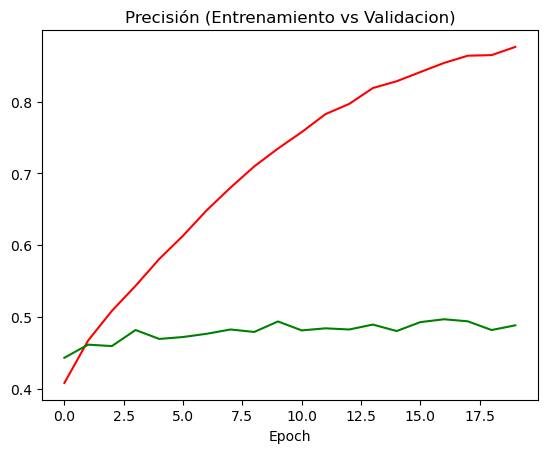

In [350]:
# Mostramos una gráfica comparativa entre la precisión de los datos de entrenamiento(rojo) y de validación(verde)

plt.plot(range(20), entrenamiento_pre_total, 'r-',range(20),validacion_pre_total,'g-')

plt.title("Precisión (Entrenamiento vs Validacion)")
plt.xlabel('Epoch')
plt.show()

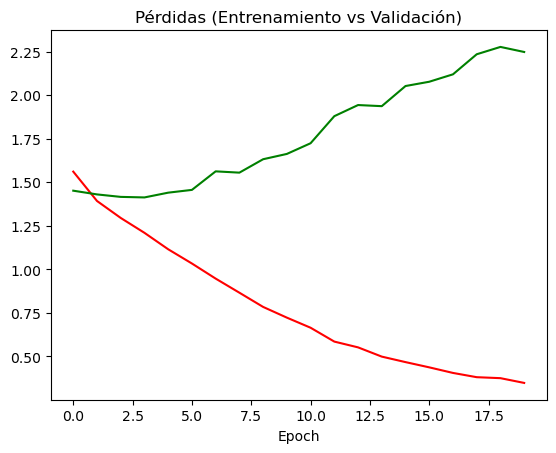

In [351]:
# Mostramos una gráfica comparativa entre las pérdidas categóricas de los datos de entrenamiento(rojo) y de validación(verde)

plt.plot(range(20), perdidas_entrenamiento_total, 'r-',range(20),perdidas_validacion_total,'g-')

plt.title("Pérdidas (Entrenamiento vs Validación)")
plt.xlabel('Epoch')
plt.show()

In [352]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ahora calculamos la matriz de confusión del modelo entrenado
targets_val=val_data_gen.labels

# Obtención de la clase predicha por el modelo
predict_x=model.predict(val_data_gen) 
predicted_label_val=np.argmax(predict_x,axis=1)

mc=confusion_matrix(targets_val, predicted_label_val)

174/174 [==============================] - 18s 100ms/step


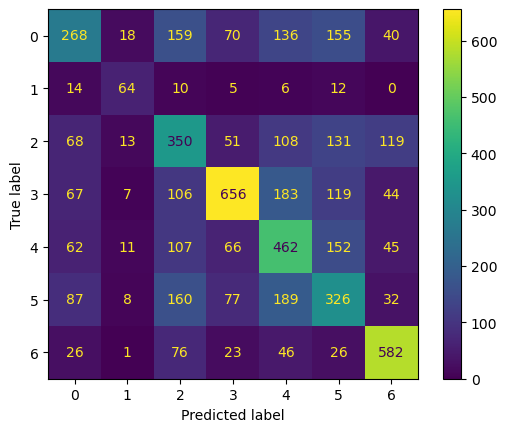

In [353]:
# Mostramos la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=mc)
disp.plot()

In [366]:
# Ahora vamos a pasar a probar la efectividad del modelo sobre imagenes nuevas
from tensorflow.keras.preprocessing.image import load_img

# Ruta del fichero en el que se encuentra la imagen que se quiere predecir
image_file = 'Dataset_Reducido/imagenes_prueba/feliz3.jpg'

# Se carga la imagen
image_base = load_img(image_file)


In [367]:
# Ahora preprocesamos dicha imagen para adaptarla a las dimensiones que acepta nuestro modelo

# Se redimensiona la imagen a las medidas del modelo
resized_image = image_base.resize((IMG_HEIGHT, IMG_WIDTH) ,resample=0)
    
# Se convierte a un numpy array
image = tf.keras.preprocessing.image.img_to_array(resized_image)
    
# Se convierte la imagen a un batch de 4 dimensiones
image=image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))
    
# Preprocesar la imagen conforme al modelo seleccionado con su funcion preprocess_input correspondiente
#final_image=tf.keras.applications.vgg16.preprocess_input(image)
#final_image=tf.keras.applications.InceptionV3.preprocess_input(image)
final_image=tf.keras.applications.mobilenet.preprocess_input(image)


In [368]:
# Calculamos la predicción en base a nuestro modelo

# Devuelve los porcentajes de pertenencia de la imagen a cada clase
outputs = model.predict(final_image)

# Obtenemos la clase que más porcentaje tiene
clase_predicha = np.argmax(outputs)

# Establecemos la correspondencia entre el número de clase y su nomenclatura
clases = {0: 'Enfado', 1: 'Disgusto', 2: 'Miedo', 3: 'Feliz', 4: 'Neutral', 5: 'Triste', 6: 'Sorprendido'}

clase_predicha_nombre = clases[clase_predicha]

# Mostramos la clase a la cual nuestro modelo ha predicho que pertenece
print(clase_predicha_nombre)

# Mostramos todas las probabilidades
for i, probabilidad in enumerate(outputs[0]):
    print("Probabilidad de clase {}: {:.4f}%".format(clases[i], probabilidad*100))


1/1 [==============================] - 0s 31ms/step
Feliz
Probabilidad de clase Enfado: 2.2084%
Probabilidad de clase Disgusto: 0.0000%
Probabilidad de clase Miedo: 0.0622%
Probabilidad de clase Feliz: 97.6372%
Probabilidad de clase Neutral: 0.0917%
Probabilidad de clase Triste: 0.0000%
Probabilidad de clase Sorprendido: 0.0004%
